# Pulling the waveforms from the raw tier

Jita (06 Feb 2023)

In [1]:
# Set up python environment
from pygama.raw.build_raw import build_raw
from pygama.dsp import build_dsp
#from pygama.lgdo import ls
import pygama.lgdo.lh5_store as lh5 
from pygama.vis.waveform_browser import WaveformBrowser

raw_file = "/global/cscratch1/sd/jita/LGND-Data/r010/raw/l200-p02-r010-cal-20230126T023019Z-tier_raw.lh5"

## Inspecting the raw file

In [2]:
print("List of raw file elements:")
lh5.ls(raw_file)

List of raw file elements:


['FCConfig',
 'ORRunDecoderForRun',
 'OrcaHeader',
 'ch000',
 'ch001',
 'ch004',
 'ch005',
 'ch006',
 'ch007',
 'ch008',
 'ch009',
 'ch010',
 'ch012',
 'ch013',
 'ch018',
 'ch019',
 'ch020',
 'ch021',
 'ch022',
 'ch023',
 'ch024',
 'ch025',
 'ch030',
 'ch031',
 'ch032',
 'ch034',
 'ch035',
 'ch036',
 'ch037',
 'ch038',
 'ch039',
 'ch040',
 'ch041',
 'ch042',
 'ch043',
 'ch044',
 'ch045',
 'ch046',
 'ch049',
 'ch050',
 'ch053',
 'ch054',
 'ch055',
 'ch056',
 'ch057',
 'ch060',
 'ch061',
 'ch062',
 'ch063',
 'ch064',
 'ch065',
 'ch066',
 'ch067',
 'ch068',
 'ch069',
 'ch070',
 'ch071',
 'ch072',
 'ch073',
 'ch074',
 'ch075',
 'ch076',
 'ch081',
 'ch082',
 'ch083',
 'ch086',
 'ch087',
 'ch088',
 'ch089',
 'ch090',
 'ch091',
 'ch092',
 'ch093',
 'ch095',
 'ch096',
 'ch097',
 'ch098',
 'ch099',
 'ch100',
 'ch101',
 'ch102',
 'ch103',
 'ch104',
 'ch105',
 'ch106',
 'ch107',
 'ch109',
 'ch110',
 'ch111',
 'ch113',
 'ch114',
 'ch115',
 'ch118',
 'ch119',
 'ch121']

In [3]:
print("List of raw file elements in ch004:")
lh5.ls(raw_file,'ch004/')

List of raw file elements in ch004:


['ch004/raw']

In [4]:
print("List of raw file elements in ch004:")
lh5.ls(raw_file,'ch004/raw/')

List of raw file elements in ch004:


['ch004/raw/baseline',
 'ch004/raw/card',
 'ch004/raw/ch_orca',
 'ch004/raw/channel',
 'ch004/raw/crate',
 'ch004/raw/daqenergy',
 'ch004/raw/deadtime',
 'ch004/raw/dr_maxticks',
 'ch004/raw/dr_start_pps',
 'ch004/raw/dr_start_ticks',
 'ch004/raw/dr_stop_pps',
 'ch004/raw/dr_stop_ticks',
 'ch004/raw/eventnumber',
 'ch004/raw/fcid',
 'ch004/raw/numtraces',
 'ch004/raw/packet_id',
 'ch004/raw/runtime',
 'ch004/raw/timestamp',
 'ch004/raw/to_abs_mu_usec',
 'ch004/raw/to_dt_mu_usec',
 'ch004/raw/to_master_sec',
 'ch004/raw/to_mu_sec',
 'ch004/raw/to_mu_usec',
 'ch004/raw/to_start_sec',
 'ch004/raw/to_start_usec',
 'ch004/raw/tracelist',
 'ch004/raw/ts_maxticks',
 'ch004/raw/ts_pps',
 'ch004/raw/ts_ticks',
 'ch004/raw/waveform']

In [5]:
#df = lh5.load_dfs(raw_file, ['baseline','card','ch_orca','channel','crate','daqenergy','deadtime','dr_maxticks','dr_start_pps','dr_stop_ticks','eventnumber','fcid','numtraces','packet_id','runtime','timestamp','to_abs_mu_usec','to_dt_mu_usec','to_master_sec','to_mu_sec','to_mu_usec','to_start_sec','to_start_usec','ts_maxticks','ts_pps','ts_ticks'], 'ch004/raw')
df = lh5.load_dfs(raw_file, ['baseline','daqenergy','eventnumber','packet_id','runtime'], 'ch004/raw')
print(df.loc[df['daqenergy'] >10000])

      baseline  daqenergy  eventnumber  packet_id     runtime
3        14989      19450           77        952    0.587104
4        15143      11898           78        966    0.589458
11       15001      21633          270       3346    1.010329
19       15004      18273          407       5021    1.317645
31       15014      16885          552       6836    1.630821
...        ...        ...          ...        ...         ...
3468     15006      12063        77734     949971  171.048165
3474     15007      10813        77896     951942  171.401147
3483     14986      18728        78160     955157  171.986806
3512     14978      14514        79043     965864  173.905442
3540     15006      15766        79989     977586  176.000608

[405 rows x 5 columns]


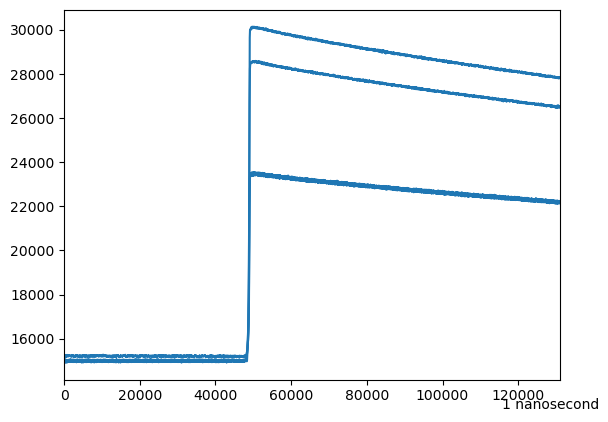

In [6]:
browser = WaveformBrowser(raw_file, "ch004/raw")
browser.draw_entry([3,4,11,3468])

<AxesSubplot:ylabel='Frequency'>

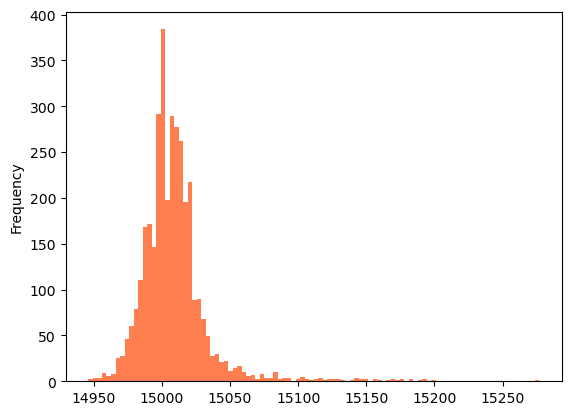

In [7]:
ax = df.loc[df['daqenergy'] >10000]
df["baseline"].plot.hist(grid=False, bins=100, rwidth=1.,color='coral')

In [8]:
#x=df['daqenergy'].to_numpy()
#print(x)
#y=df['baseline'].to_numpy()
#print(y)

In [9]:
#x1=x[1:]
#print(x1)
#y1=y[:-1]
#print(y1)

In [10]:
x=df['eventnumber'].to_numpy()
#print(x)
y=df['baseline'].to_numpy()
#print(y)

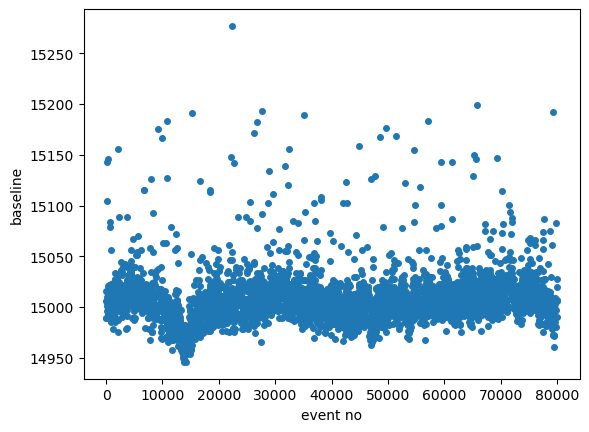

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel("event no")
plt.ylabel("baseline")
plt.plot(x, y,linestyle='None',marker='o', markersize=4)
#plt.hist2d(x1, y1,bins = 50)
#plt.colorbar()
plt.show()